<a href="https://colab.research.google.com/github/alaaguedda/employee_stay/blob/main/employee_stay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# ML
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

# System
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted.")


Mounted at /content/drive
Google Drive mounted.


In [5]:
# ============================
# UPLOAD DATASET TO DRIVE
# ============================

from google.colab import files
uploaded = files.upload()

# Automatically get the filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head()




Saving employee_dataset.csv to employee_dataset (1).csv


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [8]:
from google.colab import drive
drive.mount('/content/drive')

# Save dataset to Google Drive (choose any folder you want)
save_path = "/content/drive/MyDrive/employee_dataset.csv"
df.to_csv(save_path, index=False)

print("Dataset saved to:", save_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset saved to: /content/drive/MyDrive/employee_dataset.csv


In [9]:
# ============================
# LOAD DATASET FROM DRIVE
# ============================

file_path = "/content/drive/MyDrive/employee_dataset.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1



===== SHAPE =====
(4653, 9)

===== INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None

===== DESCRIBE =====
        Education  JoiningYear       City  PaymentTier          Age Gender  \
count        4653  4653.000000       4653  4653.000000  4653.000000   4653   
unique 

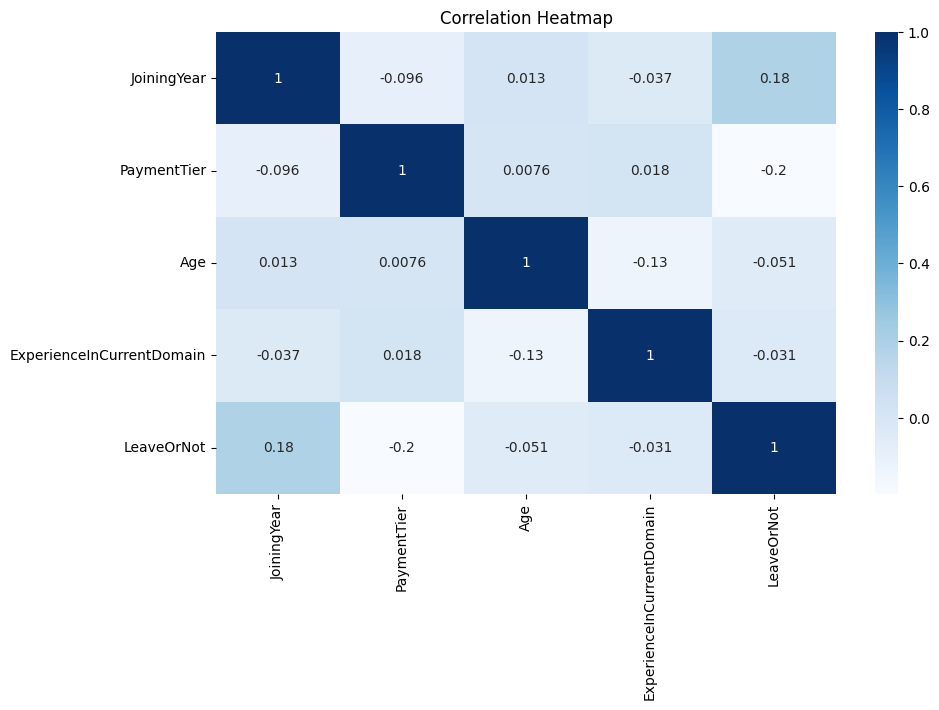

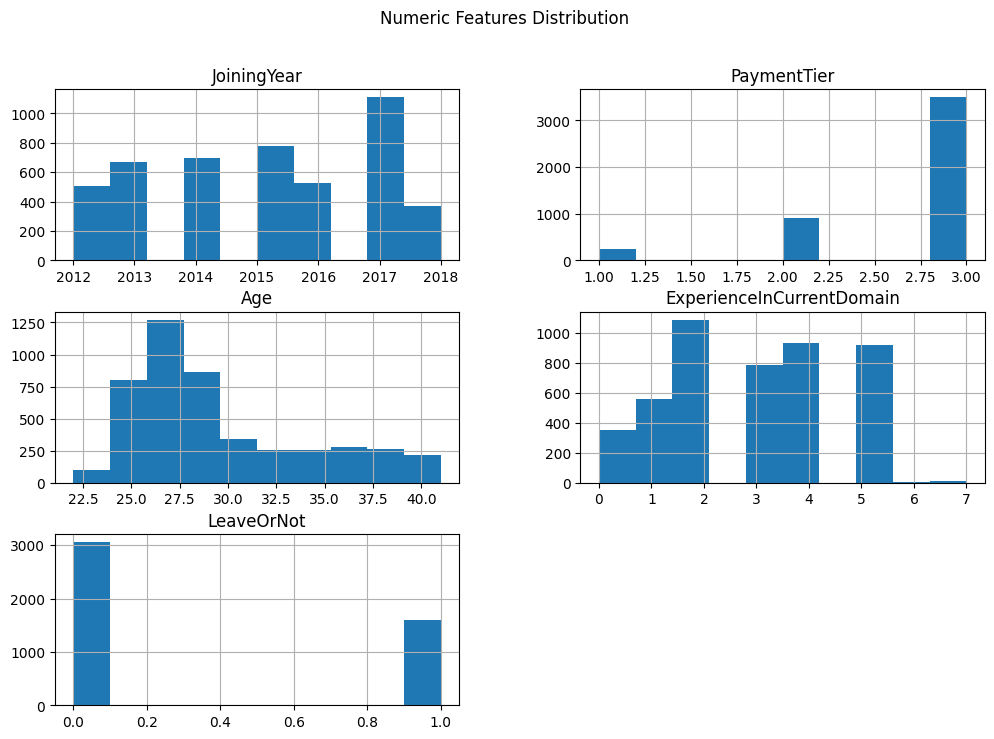

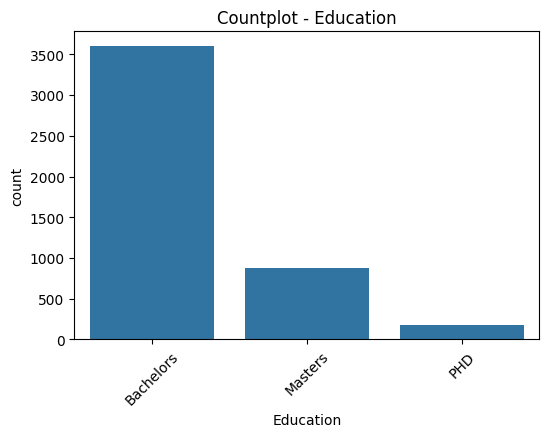

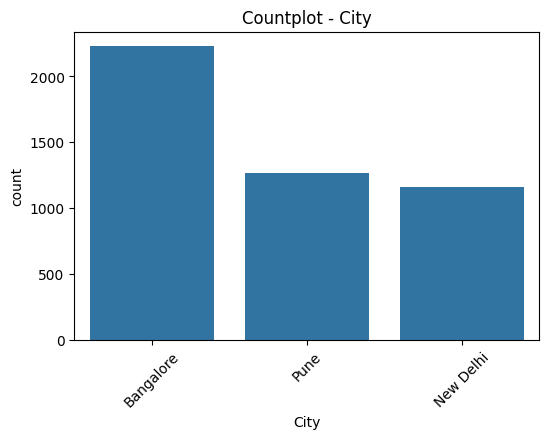

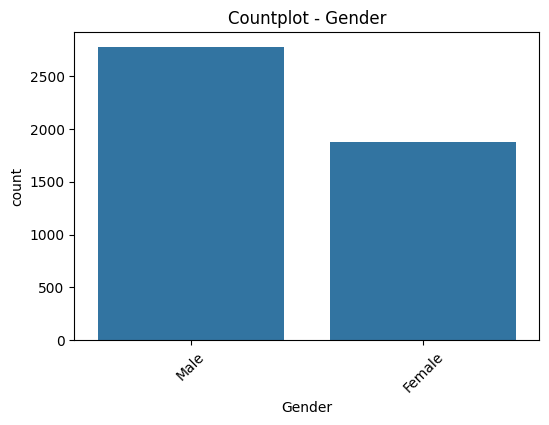

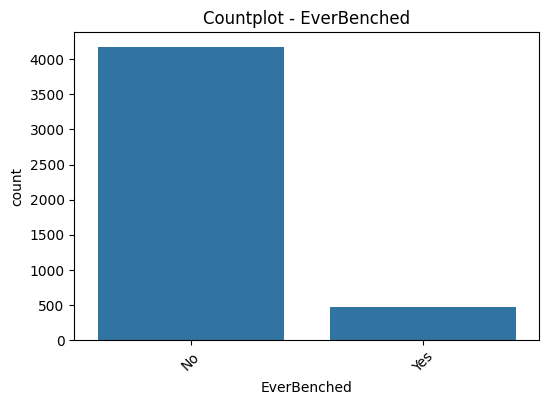

In [10]:
# ===================================
# DATA VISUALIZATION PIPELINE
# ===================================

def visualize_data(df):
    print("\n===== SHAPE =====")
    print(df.shape)

    print("\n===== INFO =====")
    print(df.info())

    print("\n===== DESCRIBE =====")
    print(df.describe(include='all'))

    # Value counts for categorical
    print("\n===== VALUE COUNTS (Categorical) =====")
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"\n--- {col} ---")
        print(df[col].value_counts())

    # Correlation heatmap (only numeric)
    plt.figure(figsize=(10,6))
    sns.heatmap(df.select_dtypes(include=np.number).corr(),
                annot=True, cmap='Blues')
    plt.title("Correlation Heatmap")
    plt.show()

    # Histograms for numeric columns
    df.select_dtypes(include=np.number).hist(figsize=(12,8))
    plt.suptitle("Numeric Features Distribution")
    plt.show()

    # Countplots for categorical variables
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        sns.countplot(x=df[col])
        plt.title(f"Countplot - {col}")
        plt.xticks(rotation=45)
        plt.show()

visualize_data(df)



Smarter visualization function ready.


/tmp/ipython-input-3419952174.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)


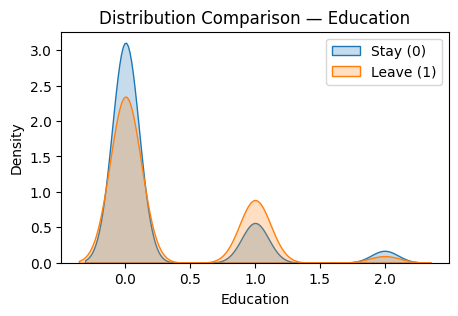

/tmp/ipython-input-3419952174.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)


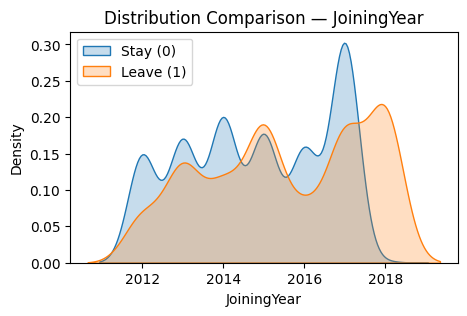

/tmp/ipython-input-3419952174.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)


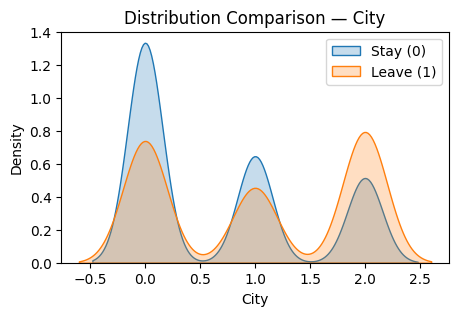

/tmp/ipython-input-3419952174.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)


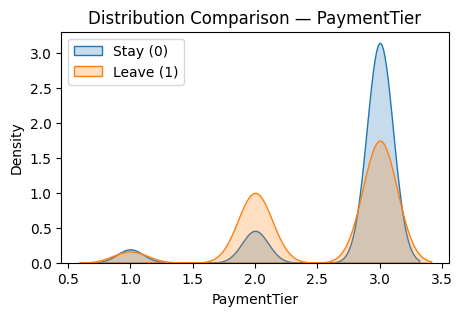

/tmp/ipython-input-3419952174.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)


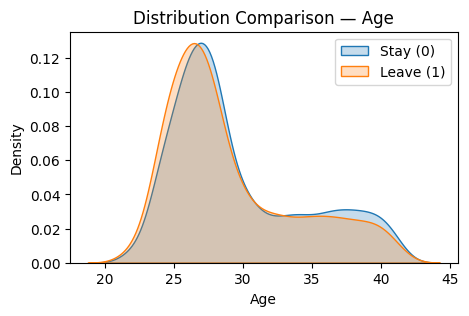

/tmp/ipython-input-3419952174.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)


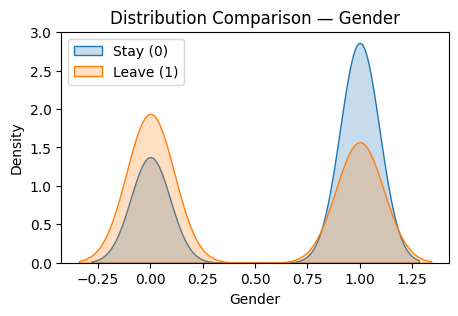

/tmp/ipython-input-3419952174.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)


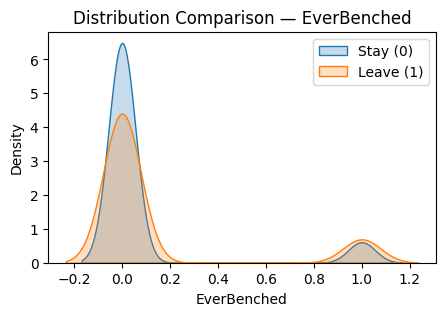

/tmp/ipython-input-3419952174.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)


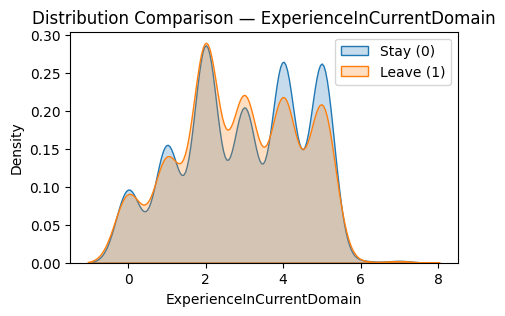

/tmp/ipython-input-3419952174.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
/tmp/ipython-input-3419952174.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)
/tmp/ipython-input-3419952174.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)
/tmp/ipython-input-3419952

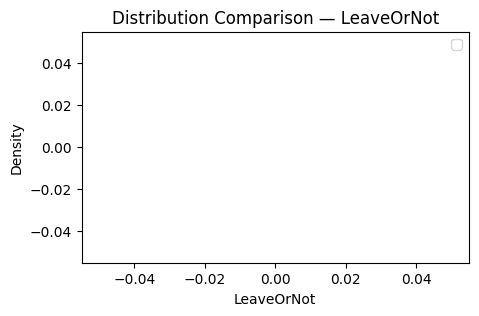

In [23]:



def smarter_visualization(df, target="LeaveOrNot"):



    # ======================================
    # 2. Boxplots For Outlier Detection
    # ======================================
    numeric = df.select_dtypes(include=np.number).columns.tolist()






    # ======================================
    # 5. Distribution Comparison for Target Classes
    # ======================================
    for col in numeric:
        plt.figure(figsize=(5,3))
        sns.kdeplot(df[df[target] == 0][col], label="Stay (0)", shade=True)
        sns.kdeplot(df[df[target] == 1][col], label="Leave (1)", shade=True)
        plt.title(f"Distribution Comparison — {col}")
        plt.legend()
        plt.show()




print("\nSmarter visualization function ready.")
smarter_visualization(df_clean)

In [11]:
# ===================================
# DATA CLEANING PIPELINE
# ===================================

def clean_data(df):

    df_clean = df.copy()

    # Convert Yes/No → 1/0
    if "EverBenched" in df_clean.columns:
        df_clean["EverBenched"] = df_clean["EverBenched"].map({"Yes": 1, "No": 0})

    # Label encode all categorical columns
    cat_cols = df_clean.select_dtypes(include='object').columns
    le = LabelEncoder()
    for col in cat_cols:
        df_clean[col] = le.fit_transform(df_clean[col])

    # Fill missing values
    df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

    return df_clean

df_clean = clean_data(df)
df_clean.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [12]:

from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted.")

clean_path = "/content/drive/MyDrive/employee_dataset_clean.csv"
df_clean.to_csv(clean_path, index=False)
print("Clean dataset saved to:", clean_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted.
Clean dataset saved to: /content/drive/MyDrive/employee_dataset_clean.csv


In [13]:
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted.")

clean_path = "/content/drive/MyDrive/employee_dataset_clean.csv"
df_clean = pd.read_csv(clean_path)

print("Clean dataset loaded successfully.")
df_clean.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted.
Clean dataset loaded successfully.


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [14]:
# ===================================
# MODEL PIPELINE - RANDOM FOREST
# ===================================

def model_pipeline(df, target="LeaveOrNot"):

    X = df.drop(columns=[target])
    y = df[target]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Model
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42
    )

    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\n===== MODEL PERFORMANCE =====")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")

    print("\n===== CLASSIFICATION REPORT =====")
    print(classification_report(y_test, y_pred))

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

    print("\n===== 5-FOLD CROSS VALIDATION (F1) =====")
    print("Scores:", cv_scores)
    print("Mean F1:", cv_scores.mean())

    return model

model = model_pipeline(df_clean)



===== MODEL PERFORMANCE =====
Accuracy : 0.8303
Precision: 0.8140
Recall   : 0.6562
F1 Score : 0.7266

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       611
           1       0.81      0.66      0.73       320

    accuracy                           0.83       931
   macro avg       0.83      0.79      0.80       931
weighted avg       0.83      0.83      0.83       931


===== 5-FOLD CROSS VALIDATION (F1) =====
Scores: [0.72854641 0.73229706 0.74829932 0.73684211 0.70413223]
Mean F1: 0.730023426021329
